# **Experiment Notebook**



In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [2]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [96]:
# 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

import matplotlib.dates as mdates

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

from hyperopt import fmin, tpe, hp, Trials, STATUS_OK





In [4]:
# Import custom package
!pip install my_krml_25552249==2025.0.6.2

---
## A. Project Description


In [5]:
# <Student to fill this section>
student_name = "Shawya Saito"
student_id = "25552249"

In [6]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [7]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

---
## B. Business Understanding

In [8]:
# <Student to fill this section>
business_use_case_description = """
Explain clearly what is the goal of this project for the business.
"""

In [9]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [10]:
# <Student to fill this section>
business_objectives = """
What will be the impact of accurate or incorrect results?
"""

In [11]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [12]:
# <Student to fill this section>
stakeholders_expectations_explanations = """
How will the results be used?
Who will be the users of your predictions? Who will be impacted by your predictions?
"""

In [13]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [14]:
# Load data
df = pd.read_csv("../../data/raw/sydney_weather_2010_2024.csv")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          5479 non-null   object 
 1   weather_code                  5479 non-null   float64
 2   temperature_2m_mean           5479 non-null   float64
 3   temperature_2m_max            5479 non-null   float64
 4   temperature_2m_min            5479 non-null   float64
 5   apparent_temperature_mean     5479 non-null   float64
 6   apparent_temperature_max      5479 non-null   float64
 7   apparent_temperature_min      5479 non-null   float64
 8   precipitation_sum             5479 non-null   float64
 9   rain_sum                      5479 non-null   float64
 10  snowfall_sum                  5479 non-null   float64
 11  precipitation_hours           5479 non-null   float64
 12  wind_speed_10m_max            5479 non-null   float64
 13  win

Change date as a date datatype

In [16]:
df['date'] = pd.to_datetime(df['date'])

In [17]:
display(df.head(), df.tail())

,date,weather_code,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,apparent_temperature_max,apparent_temperature_min,precipitation_sum,rain_sum,...,surface_pressure_max,surface_pressure_min,winddirection_10m_dominant,wind_gusts_10m_mean,wind_speed_10m_mean,wind_gusts_10m_min,wind_speed_10m_min,wet_bulb_temperature_2m_mean,wet_bulb_temperature_2m_max,wet_bulb_temperature_2m_min
0,2009-12-31 14:00:00+00:00,53.0,22.964250,25.670502,21.070500,25.151611,26.715890,24.240880,3.9,3.9,...,1008.16705,1003.63450,331.647500,21.330000,10.419551,7.200000,4.072935,20.643309,21.304327,19.931772
1,2010-01-01 14:00:00+00:00,63.0,23.612165,26.920502,20.970500,26.942467,32.614998,22.179842,8.6,8.6,...,1005.03217,998.06805,298.610300,26.010002,8.355687,15.119999,1.297998,21.520597,23.316803,19.692732
2,2010-01-02 14:00:00+00:00,51.0,19.882996,20.620499,19.470500,19.709002,21.280840,19.180962,1.1,1.1,...,1013.45440,1005.12430,146.744640,28.275000,12.964748,12.959999,6.915374,16.673801,19.032654,15.879213
3,2010-01-03 14:00:00+00:00,51.0,20.887167,22.520500,19.220500,21.016272,22.343325,19.466248,0.6,0.6,...,1014.66760,1011.22390,69.884770,23.565000,11.067534,11.159999,5.623380,17.092829,17.960950,15.985977
4,2010-01-04 14:00:00+00:00,3.0,22.520498,26.020500,18.620499,24.393919,30.018890,19.811030,0.0,0.0,...,1012.26750,1007.10223,35.137077,24.285002,9.724721,10.080000,4.334974,19.079020,21.130150,16.724476


,date,weather_code,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,apparent_temperature_max,apparent_temperature_min,precipitation_sum,rain_sum,...,surface_pressure_max,surface_pressure_min,winddirection_10m_dominant,wind_gusts_10m_mean,wind_speed_10m_mean,wind_gusts_10m_min,wind_speed_10m_min,wet_bulb_temperature_2m_mean,wet_bulb_temperature_2m_max,wet_bulb_temperature_2m_min
5474,2024-12-26 14:00:00+00:00,53.0,26.202085,35.187500,20.887499,26.242342,37.215233,20.495504,0.8,0.8,...,1001.35250,994.86365,339.781250,41.295000,16.679815,22.68,8.211235,19.730782,22.680115,17.356268
5475,2024-12-27 14:00:00+00:00,51.0,21.352081,24.037500,18.587500,21.829940,25.389044,19.079412,0.9,0.9,...,1005.42200,1001.24490,109.408130,31.574997,12.241256,15.48,7.486788,17.523623,18.228878,16.697666
5476,2024-12-28 14:00:00+00:00,1.0,22.214584,27.887499,16.937500,22.691307,28.141224,18.093904,0.0,0.0,...,1012.48310,1004.95560,136.802410,27.345001,10.361734,7.20,3.054701,17.012634,18.846426,15.039368
5477,2024-12-29 14:00:00+00:00,51.0,22.462500,25.587500,19.737500,23.395332,27.735592,20.556278,0.3,0.3,...,1014.50604,1009.16470,84.956360,31.214998,12.572087,19.80,8.936778,18.610620,19.632471,17.276335
5478,2024-12-30 14:00:00+00:00,3.0,22.993752,26.487500,18.737500,24.854470,28.978016,21.394054,0.0,0.0,...,1009.80255,1007.22280,65.856026,25.004995,9.582100,2.88,1.310420,19.490635,20.240698,18.014656


Can observe that 2009-12-31 is included at the start. Since we are only looking at 2010 - 2024, this record will be removed

In [18]:
# removing 2009 record
df = df[df['date'].dt.year != 2009]

Quick check for duplicates and NA values

In [19]:
print(f"Duplicated values:\n{df.duplicated().sum()}")
print(f"All NA counts:\n{df.isna().sum().sum()}")

Duplicated values:
0
All NA counts:
0


### C.2 Define Target variable

Define the target variable by obtaining the sum of the next three days

In [20]:
# Sort by date just in case
df = df.sort_values('date').reset_index(drop=True)

# Regression target: sum of precipitation next 3 days
df['precipitation_sum_next_3_days'] = df['precipitation_sum'].shift(-1) + \
                                  df['precipitation_sum'].shift(-2) + \
                                  df['precipitation_sum'].shift(-3)

In [21]:
# <Student to fill this section>
target_definition_explanations = """
Explain the rationale on the definition of the target variable according to your business use case.
"""

In [22]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [23]:
# target variable is the precipitation sum of the next 3 days
target = 'precipitation_sum_next_3_days'

### C.4 Explore Target variable

As our target variable is based on the prediction of the next 3 days, data without the next 3 days of precipitation sum will have NaN values. These will have to be removed from the dataset.

In [24]:
# Look at the last few rows of the data
df[['date', 'precipitation_sum_next_3_days']].tail(5)

,date,precipitation_sum_next_3_days
5473,2024-12-26 14:00:00+00:00,1.2
5474,2024-12-27 14:00:00+00:00,0.3
5475,2024-12-28 14:00:00+00:00,NaN
5476,2024-12-29 14:00:00+00:00,NaN
5477,2024-12-30 14:00:00+00:00,NaN


In [25]:
# Remove the last three rows of the data
df = df.iloc[:-3].reset_index(drop=True)

In [26]:
# Copy the data for EDA
df_clean = df.copy()

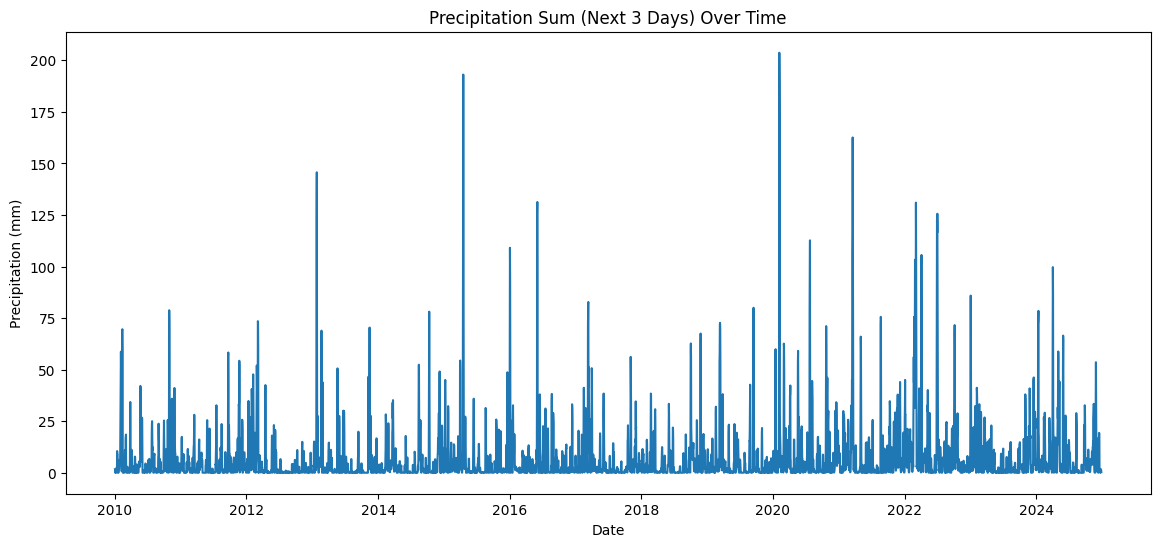

In [27]:
# Precipitation sum next 3 days over time
plt.figure(figsize=(14,6))
sns.lineplot(data=df_clean, x="date", y=target)

plt.title("Precipitation Sum (Next 3 Days) Over Time")
plt.ylabel("Precipitation (mm)")
plt.xlabel("Date")
plt.show()

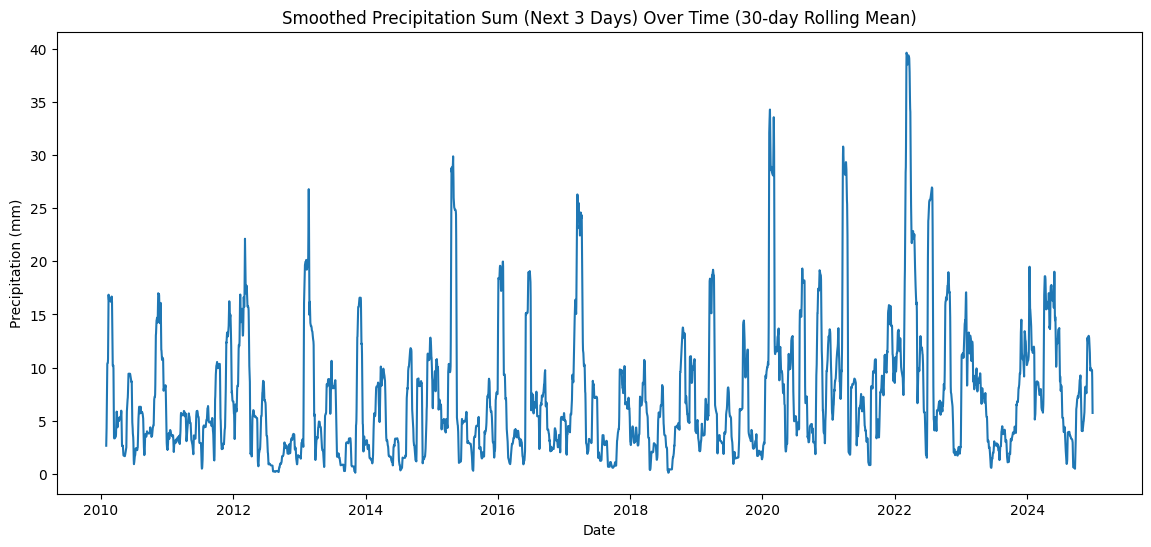

In [28]:
# 30-day rolling average to smooth noise
df_clean["rolling_precip"] = df_clean[target].rolling(window=30).mean()

plt.figure(figsize=(14,6))
sns.lineplot(data=df_clean, x="date", y="rolling_precip")

plt.title("Smoothed Precipitation Sum (Next 3 Days) Over Time (30-day Rolling Mean)")
plt.ylabel("Precipitation (mm)")
plt.xlabel("Date")
plt.show()

df_clean.drop("rolling_precip", axis=1, inplace=True)

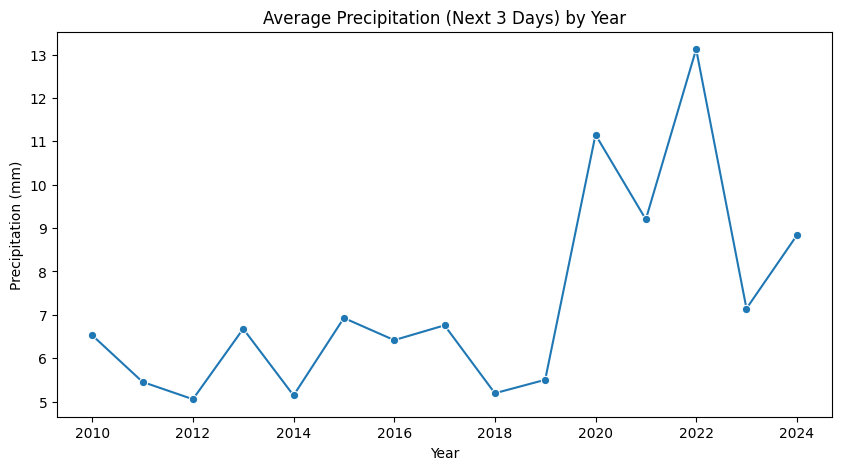

In [29]:
# Extract year and month
df_clean['year'] = df_clean['date'].dt.year
df_clean['month'] = df_clean['date'].dt.month

plt.figure(figsize=(10,5))
sns.lineplot(
    data=df_clean.groupby("year")[target].mean().reset_index(),
    x="year", y=target, marker="o"
)
plt.title("Average Precipitation (Next 3 Days) by Year")
plt.ylabel("Precipitation (mm)")
plt.xlabel("Year")
plt.show()

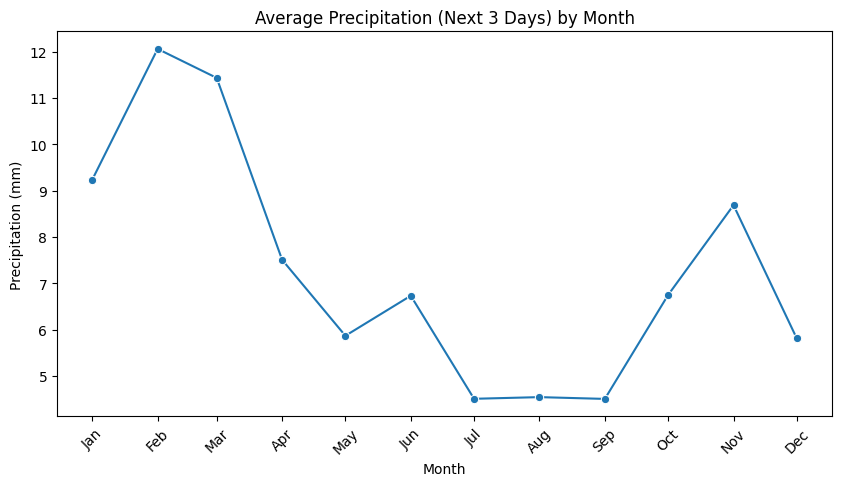

In [30]:
# Create a dummy date column using month numbers (all in the same year)
df_month = df_clean.groupby("month")[target].mean().reset_index()
df_month["date"] = pd.to_datetime(df_month["month"], format="%m")

plt.figure(figsize=(10,5))
sns.lineplot(data=df_month, x="date", y=target, marker="o")

plt.title("Average Precipitation (Next 3 Days) by Month")
plt.ylabel("Precipitation (mm)")
plt.xlabel("Month")

# Format x-axis as month names
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)
plt.show()

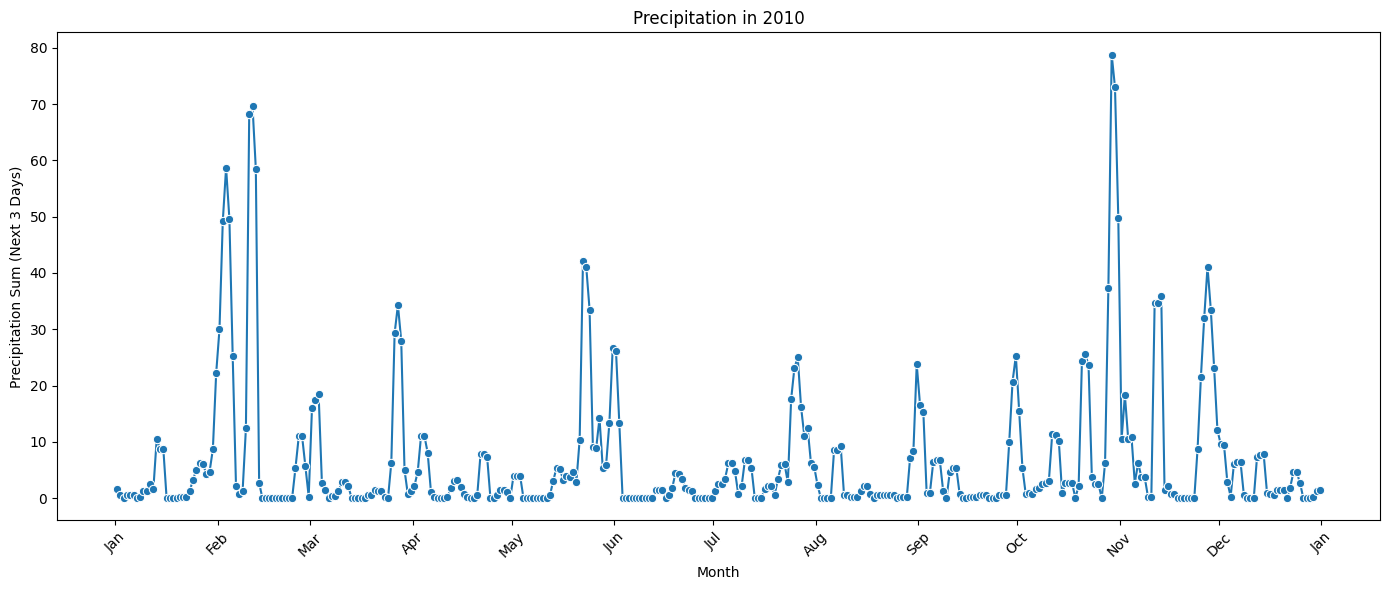

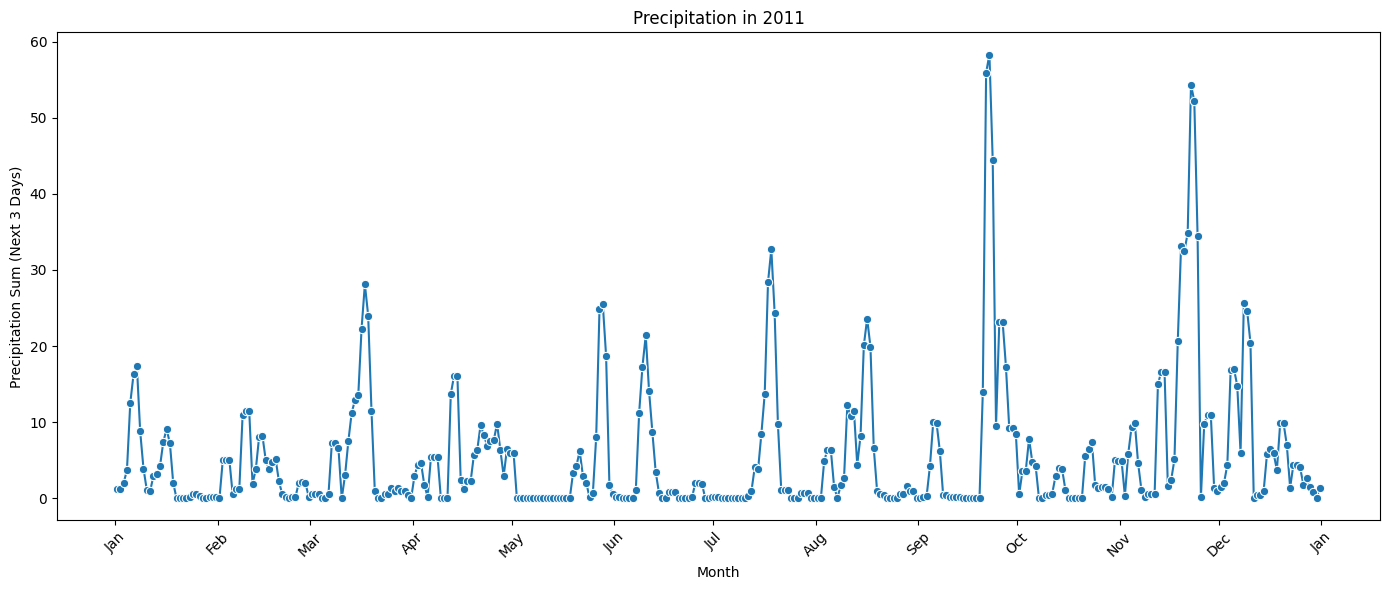

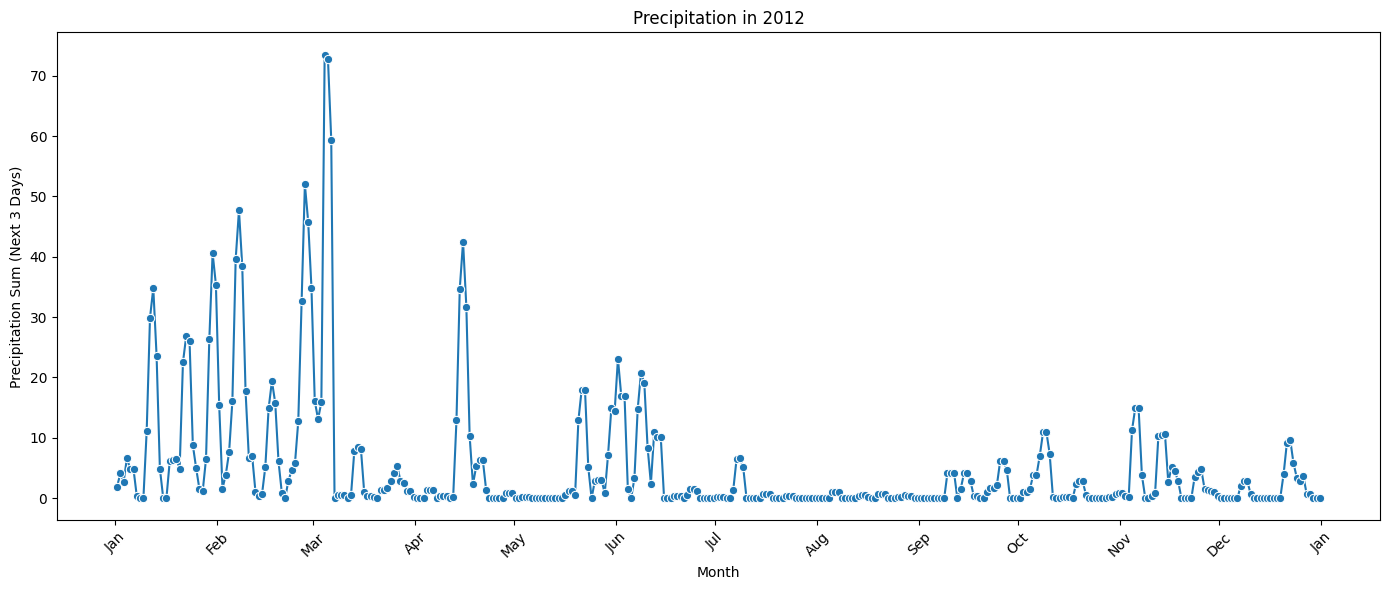

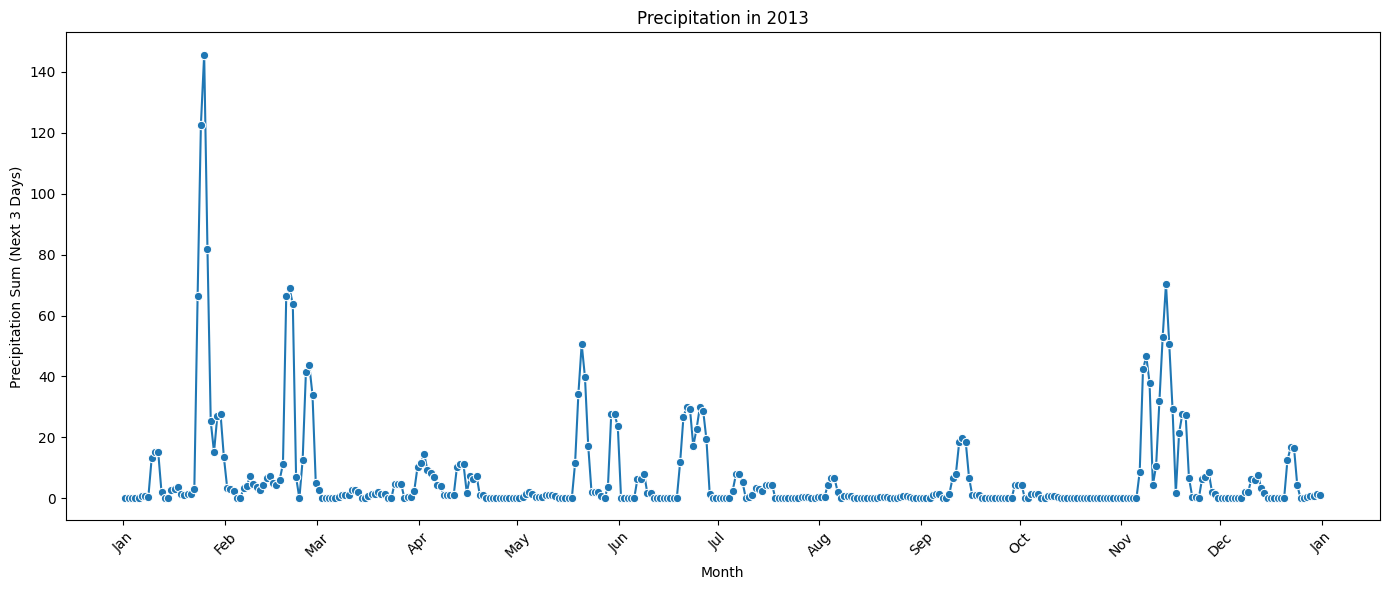

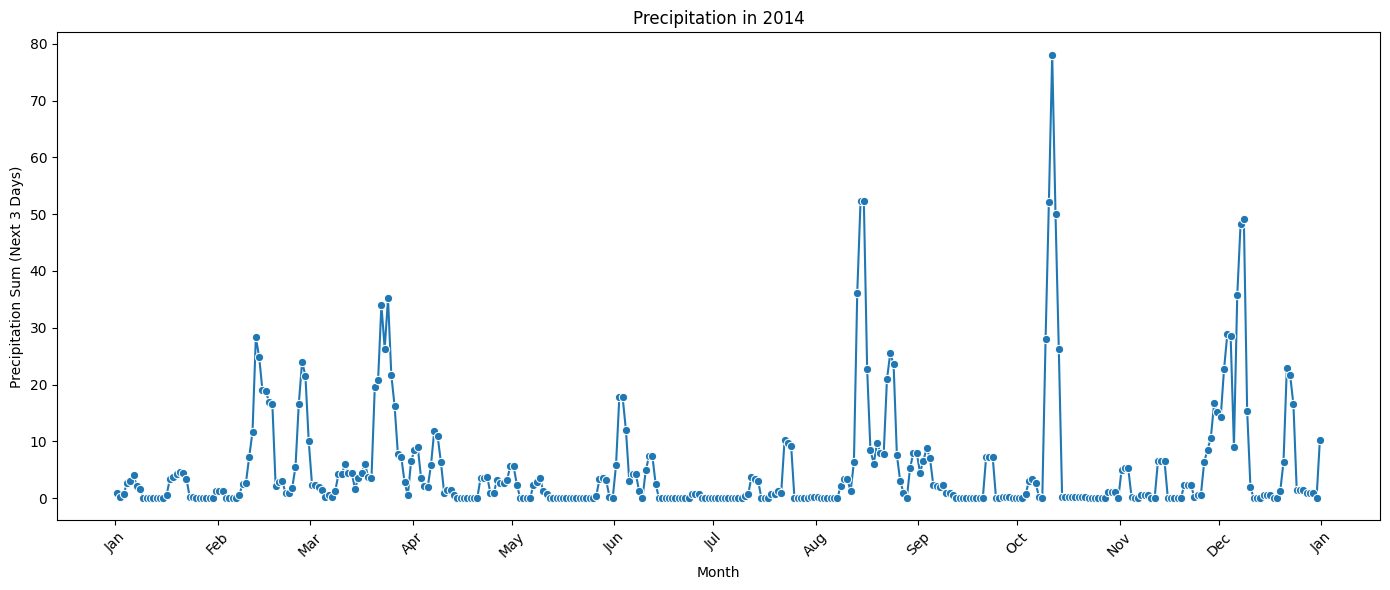

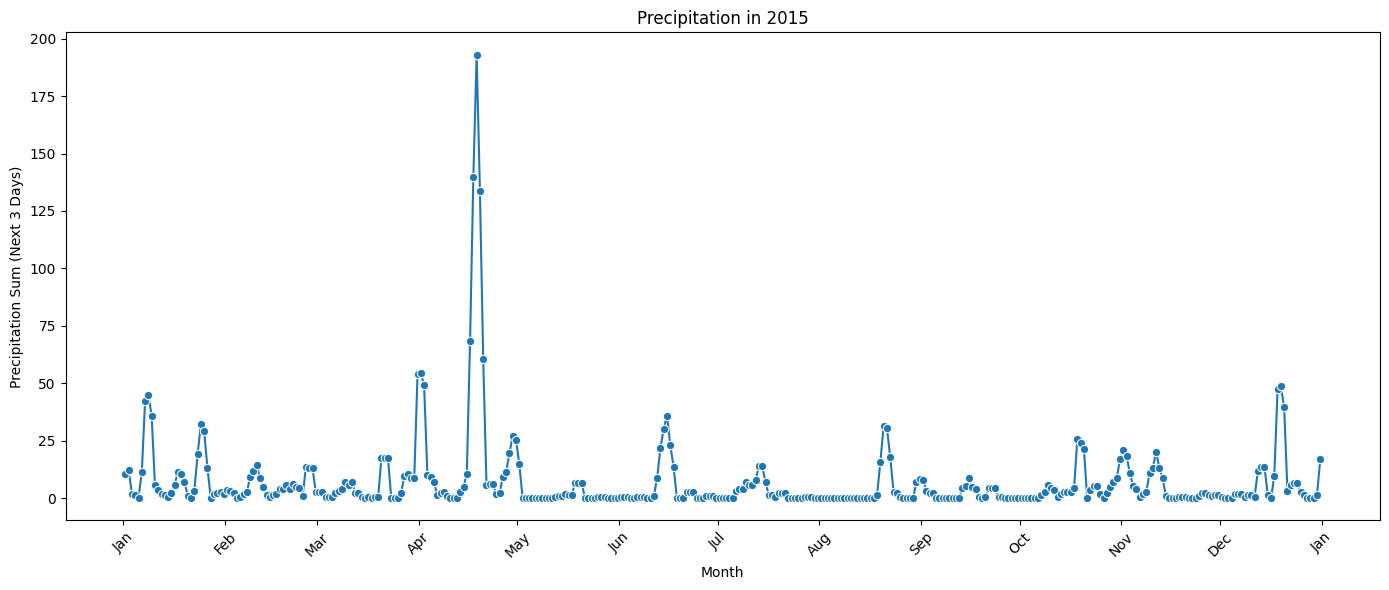

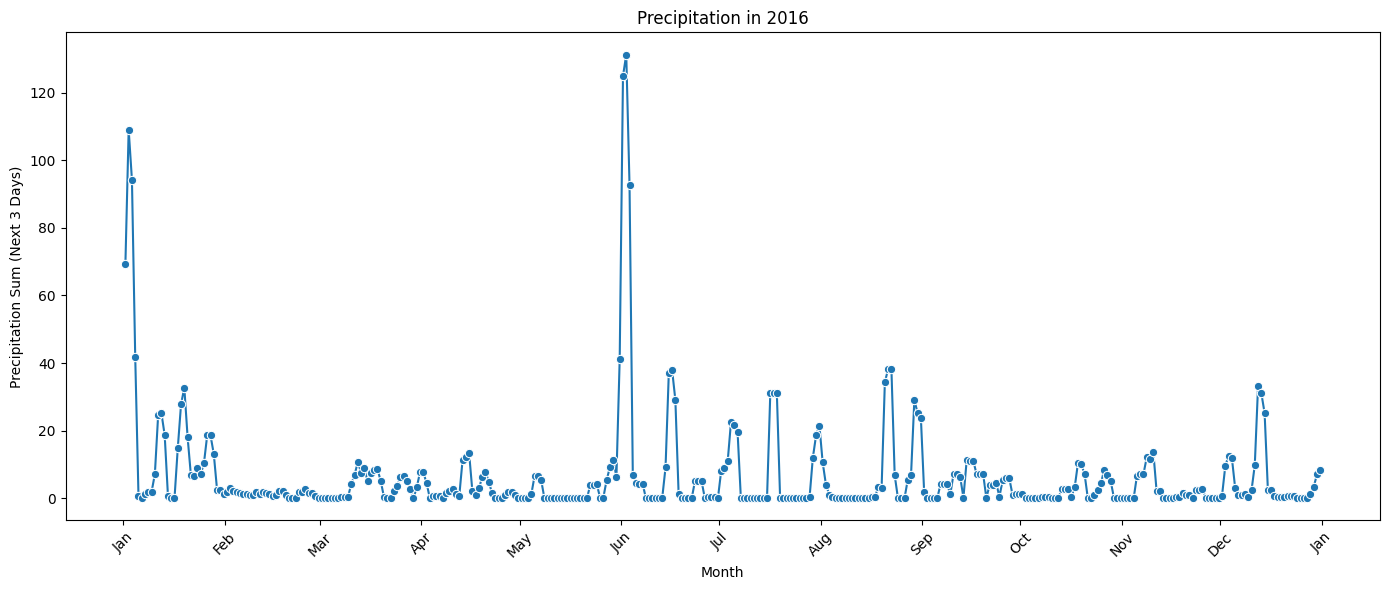

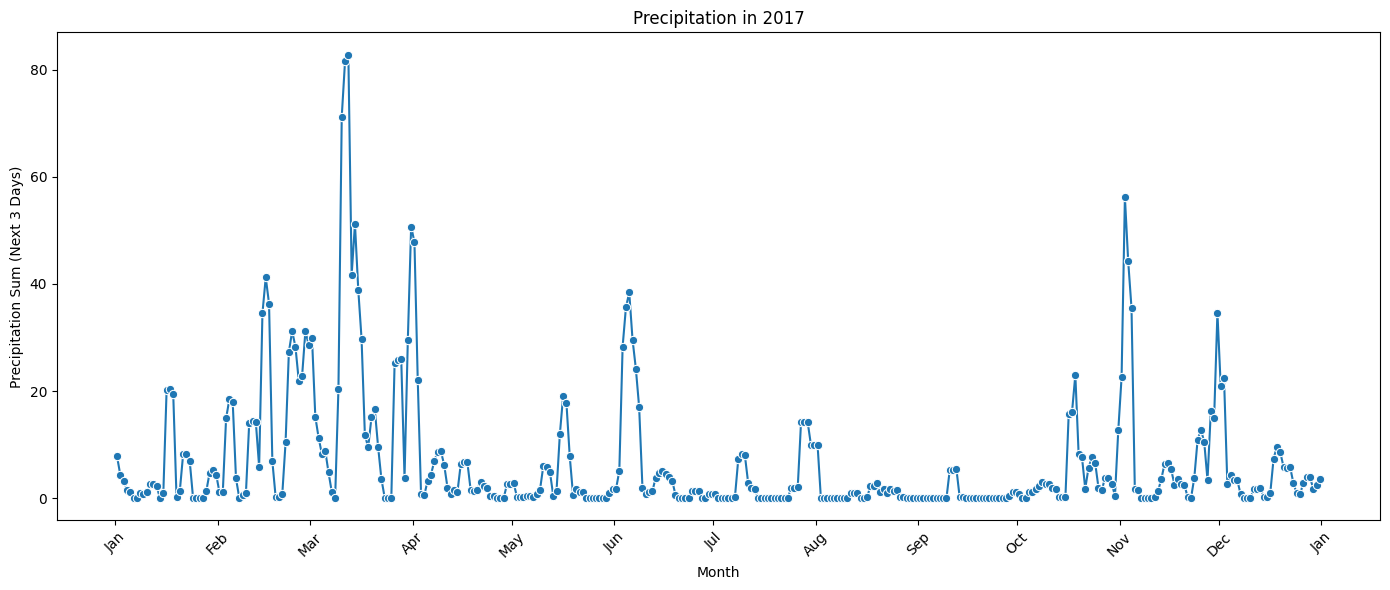

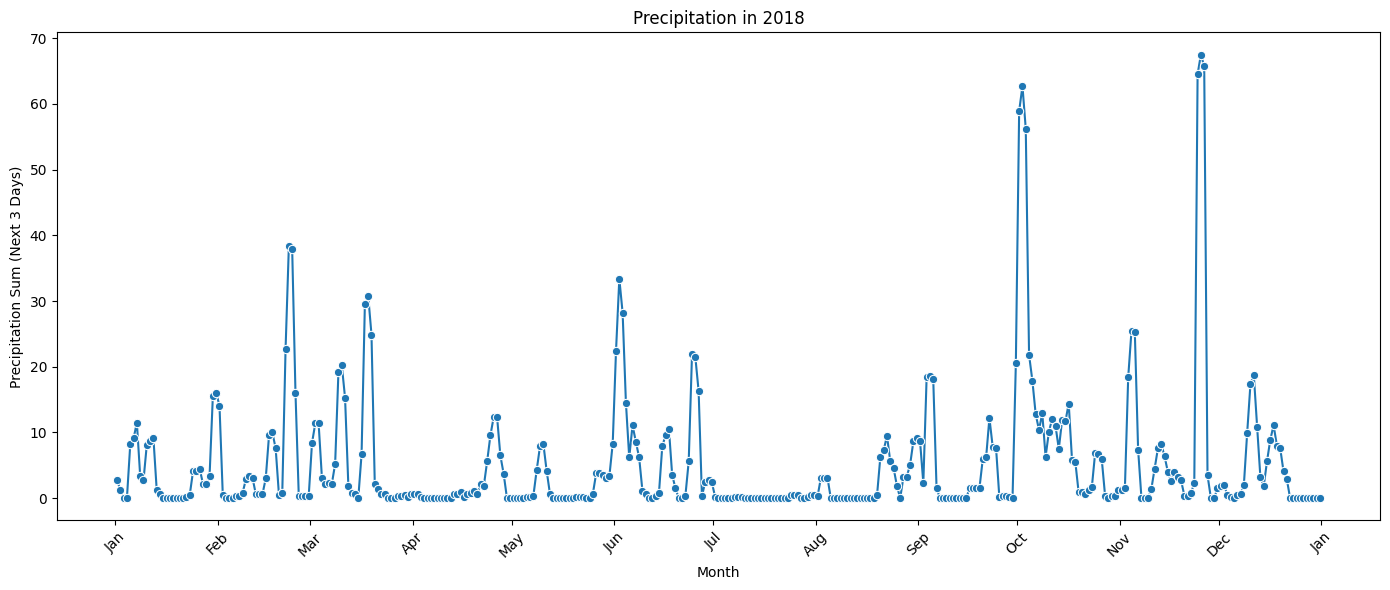

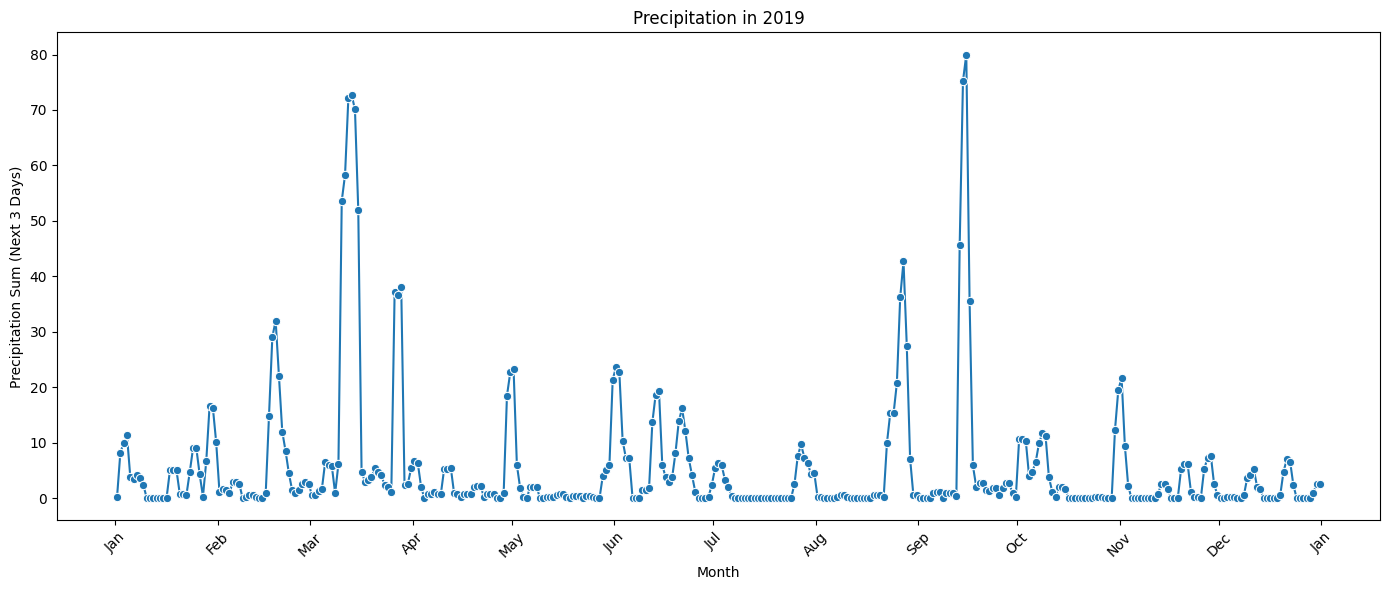

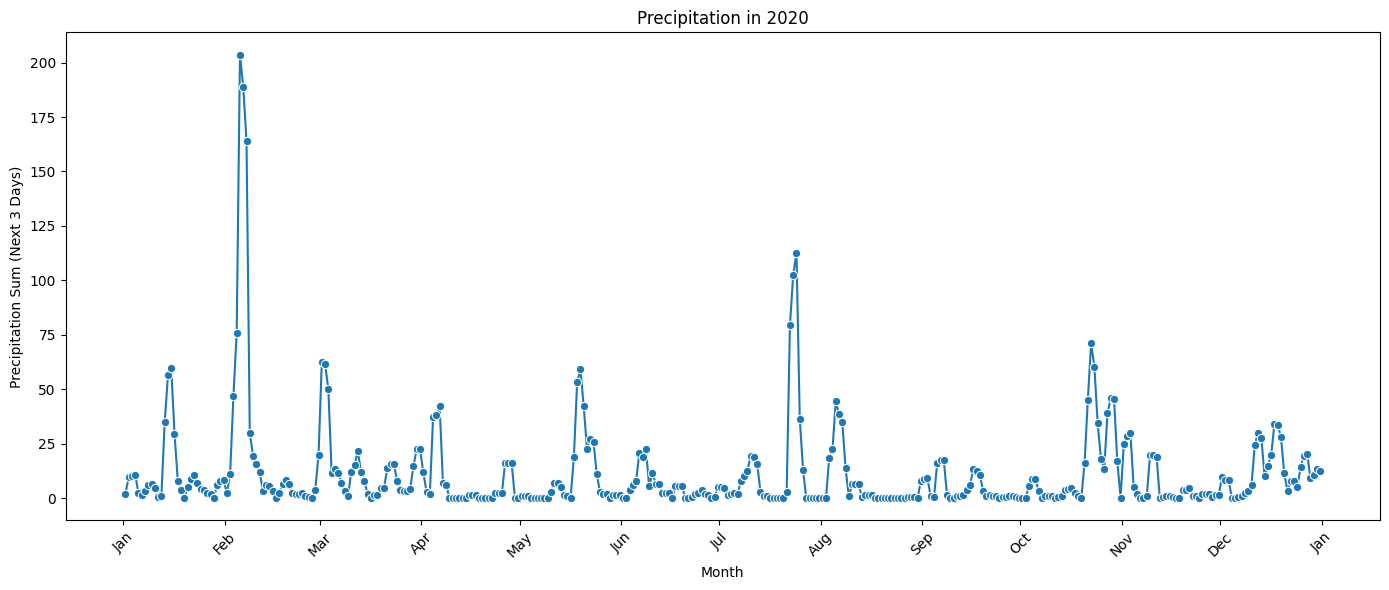

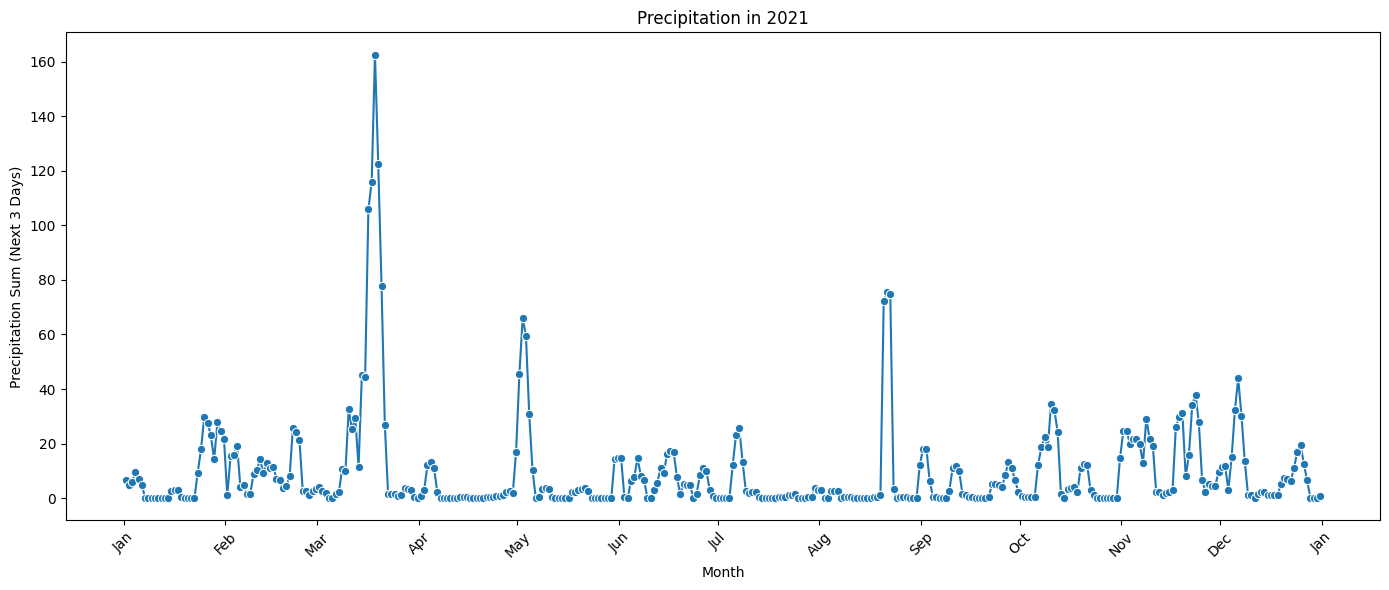

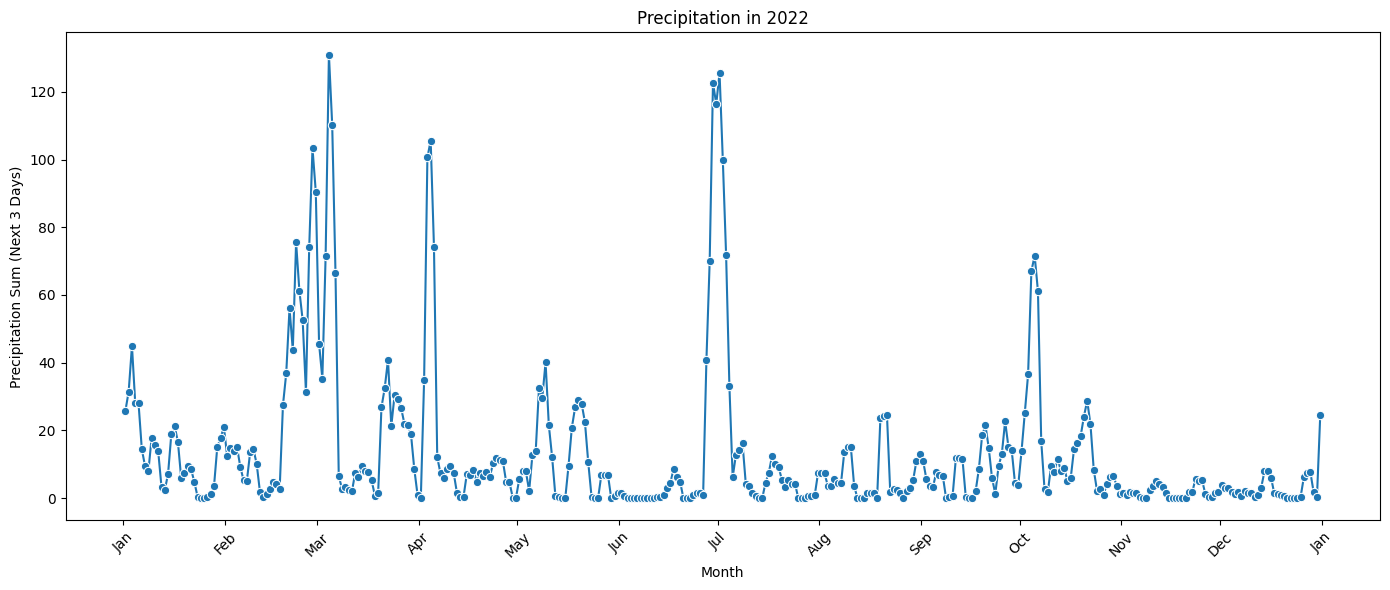

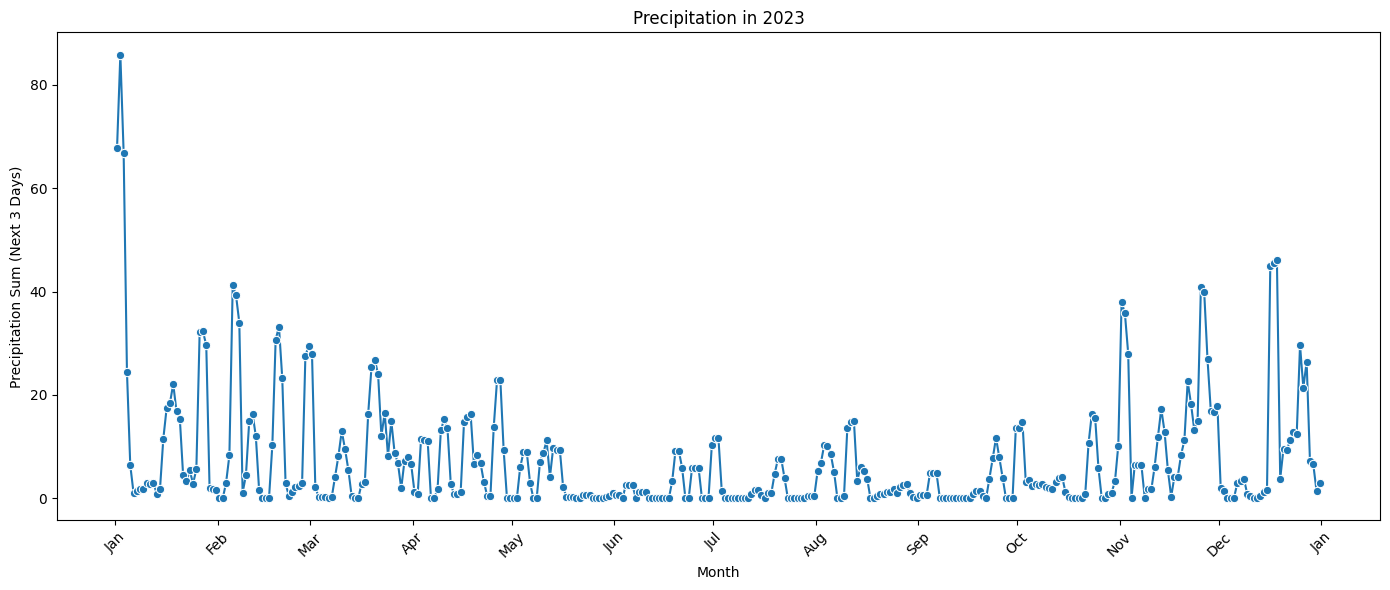

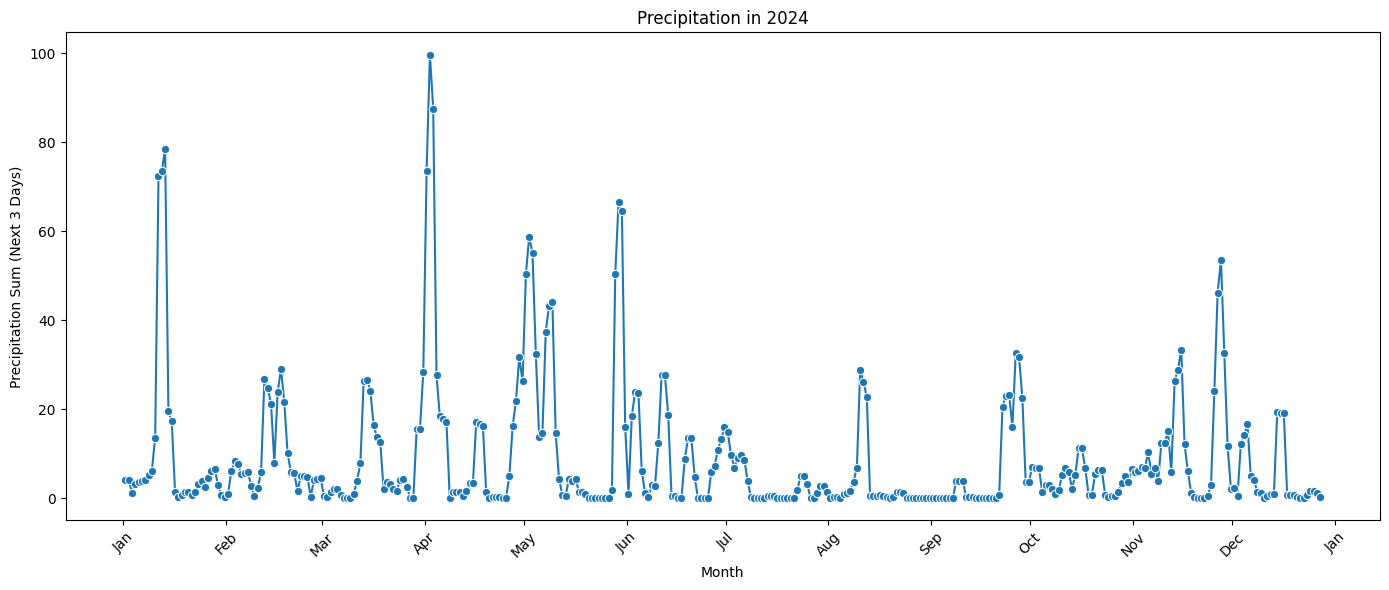

In [31]:
# See the precipitation over the years for any seasonal patterns

# Get all unique years
years = df['date'].dt.year.unique()

# Loop through each year
for year in sorted(df['date'].dt.year.unique()):
    df_year = df[df['date'].dt.year == year]
    
    plt.figure(figsize=(14,6))
    sns.lineplot(data=df_year, x='date', y='precipitation_sum_next_3_days',marker='o')
    
    # Major ticks: months
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    
    plt.title(f'Precipitation in {year}')
    plt.xlabel('Month')
    plt.ylabel('Precipitation Sum (Next 3 Days)')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Distribution of target

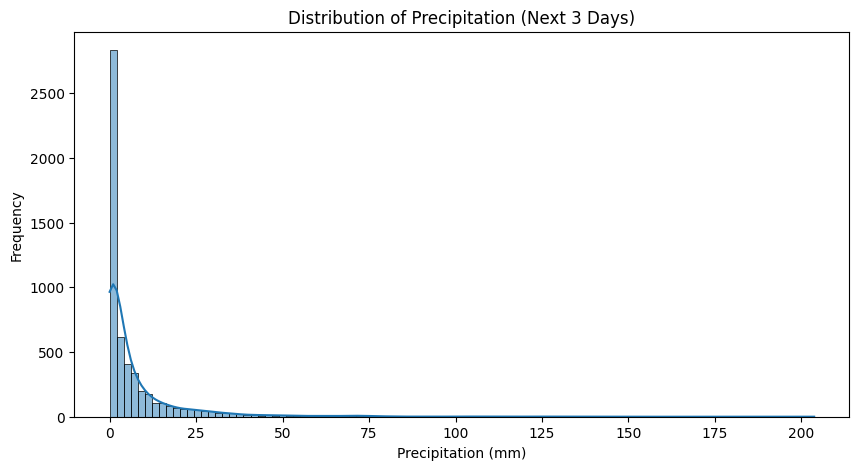

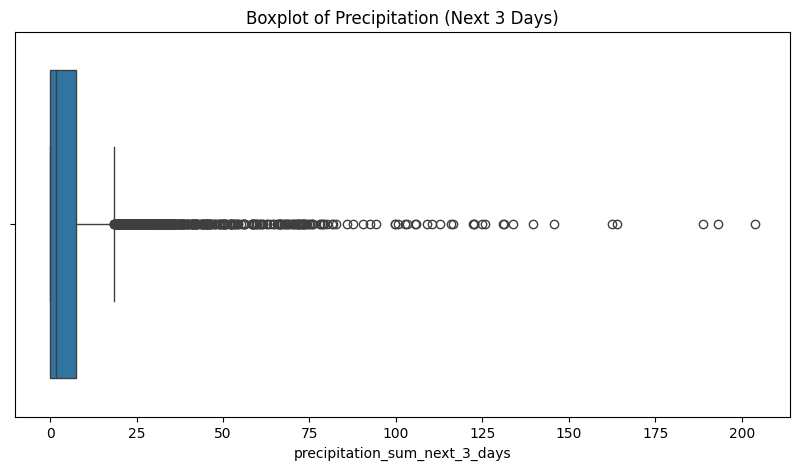

In [32]:
# Plot the distribution of target
plt.figure(figsize=(10,5))
sns.histplot(df_clean[target], bins=100, kde=True)
plt.title("Distribution of Precipitation (Next 3 Days)")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Frequency")
plt.show

plt.figure(figsize=(10,5))
sns.boxplot(x=df_clean[target])
plt.title("Boxplot of Precipitation (Next 3 Days)")
plt.show()

In [33]:
zero_count = (df_clean[target] == 0).sum()
nonzero_count = (df_clean[target] > 0).sum()
print(f"Zero precipitation days: {zero_count}, Non-zero: {nonzero_count}")


Zero precipitation days: 1177, Non-zero: 4298


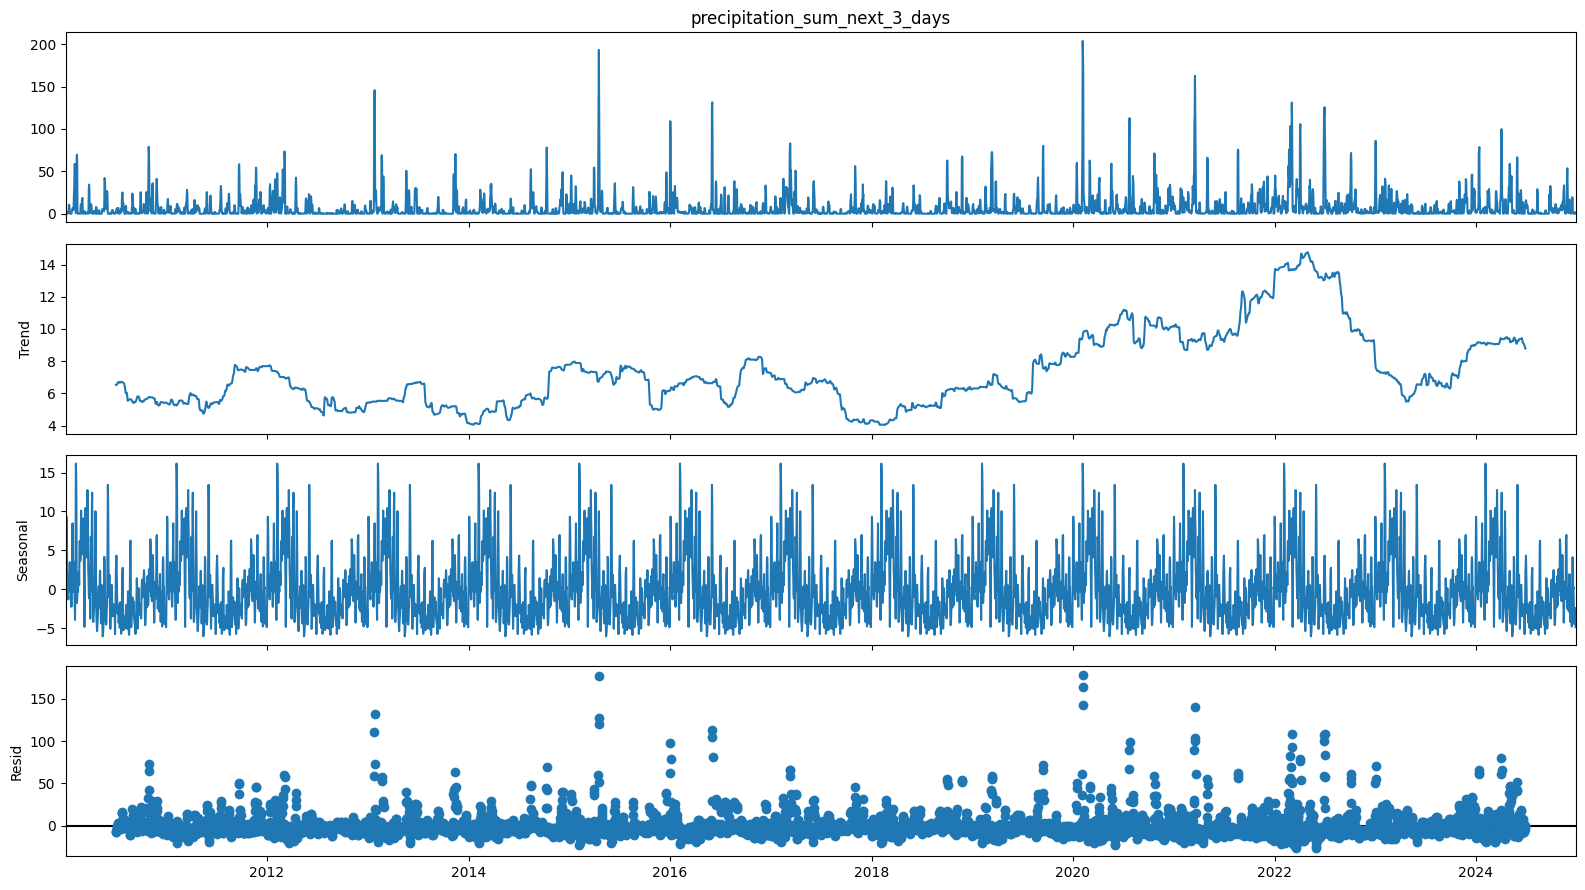

In [34]:
# Seasonal decomposition
decompose_result = seasonal_decompose(df_clean.set_index("date")[target], 
                                      period=365, model='additive')
fig = decompose_result.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
plt.show()

In [35]:
# <Student to fill this section>
target_distribution_explanations = """
provide a detailed analysis on the target variable, its distribution, limitations, issues, ...
"""

In [36]:
# Do not modify this code
print_tile(size="h3", key='target_distribution_explanations', value=target_distribution_explanations)

### C.5 Explore Feature of Interest `weather_code`

As weather_code is the only categorical column, this feature will be explored

In [37]:
# Look at the unique counts for weather code
df_clean.weather_code.value_counts(ascending=False)

weather_code
3.0     1613
51.0    1361
53.0     554
61.0     402
2.0      373
1.0      327
63.0     321
0.0      292
55.0     187
65.0      45
Name: count, dtype: int64

In [38]:
# Mapping dictionary from code to description
weather_map = {
    0: "Sunny",
    1: "Mainly Sunny",
    2: "Partly Cloudy",
    3: "Cloudy",
    51: "Light Drizzle",
    53: "Drizzle",
    55: "Heavy Drizzle",
    61: "Light Rain",
    63: "Rain",
    65: "Heavy Rain"
}

# Add a new column with descriptions and drop original weather code
df_clean["weather_desc"] = df_clean["weather_code"].map(weather_map)
df_clean = df_clean.drop("weather_code", axis=1)

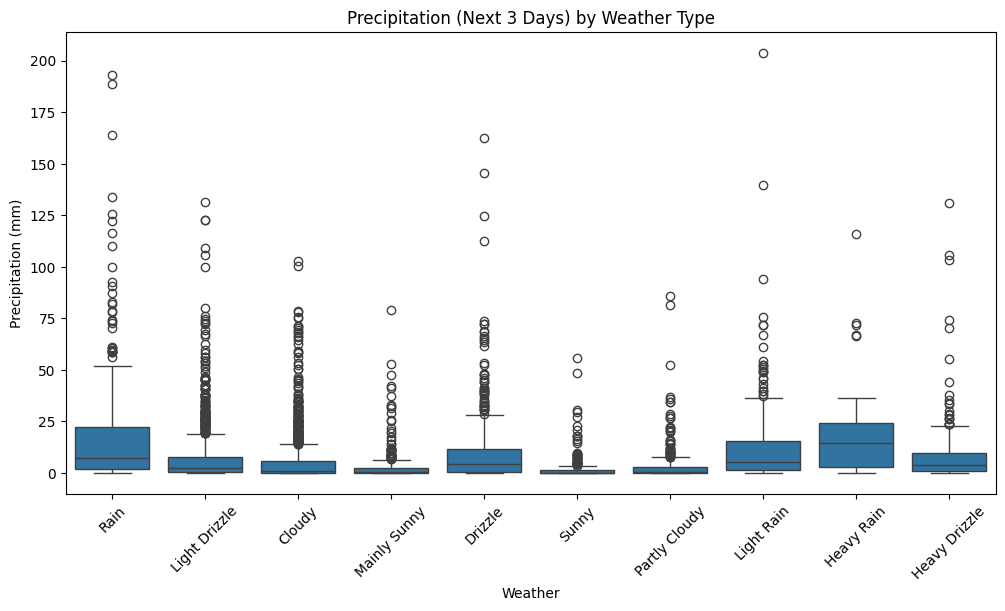

In [39]:
# Relationship with target
plt.figure(figsize=(12,6))
sns.boxplot(x="weather_desc", y="precipitation_sum_next_3_days", data=df_clean)
plt.title("Precipitation (Next 3 Days) by Weather Type")
plt.ylabel("Precipitation (mm)")
plt.xlabel("Weather")
plt.xticks(rotation=45)
plt.show()

weather_desc
Heavy Rain       20.059999
Rain             18.124611
Light Rain       11.798507
Drizzle           9.818051
Heavy Drizzle     9.527807
Light Drizzle     7.141220
Cloudy            5.202728
Partly Cloudy     3.463539
Mainly Sunny      3.416514
Sunny             2.096575
Name: precipitation_sum_next_3_days, dtype: float64


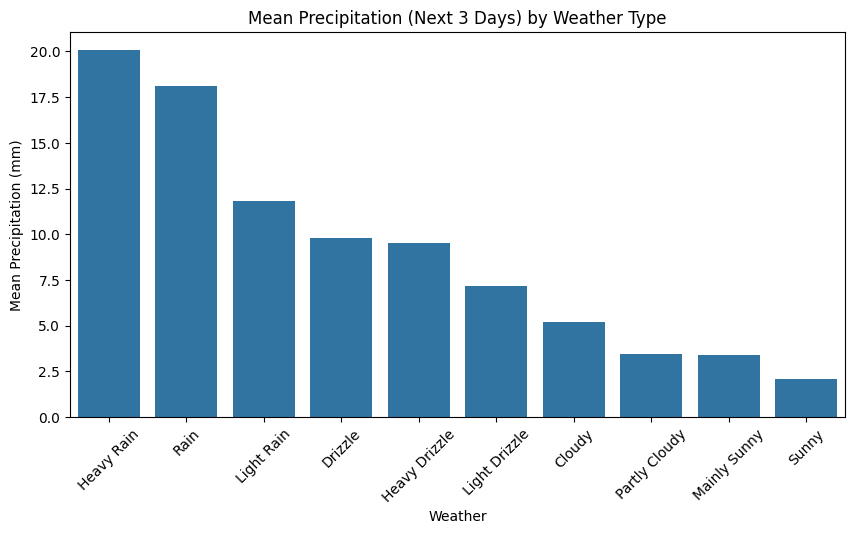

In [40]:
mean_precip = df_clean.groupby("weather_desc")["precipitation_sum_next_3_days"].mean().sort_values(ascending=False)
print(mean_precip)

# Optional: bar plot
plt.figure(figsize=(10,5))
sns.barplot(x=mean_precip.index, y=mean_precip.values)
plt.title("Mean Precipitation (Next 3 Days) by Weather Type")
plt.ylabel("Mean Precipitation (mm)")
plt.xlabel("Weather")
plt.xticks(rotation=45)
plt.show()

In [41]:
from scipy.stats import f_oneway

# Create list of precipitation arrays for each weather type
groups = [group[target].values for name, group in df_clean.groupby("weather_desc")]

# One-way ANOVA
f_stat, p_val = f_oneway(*groups)
print("F-statistic:", f_stat)
print("p-value:", p_val)


F-statistic: 45.09782599240354
p-value: 7.826222146472009e-79


In [42]:
# <Student to fill this section>
feature_1_insights = """
provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...
"""

In [43]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### C.6 Explore Feature of Interest `date`

In [44]:
# Basic time features
df_clean['year'] = df_clean['date'].dt.year
df_clean['month'] = df_clean['date'].dt.month
df_clean['day_of_week'] = df_clean['date'].dt.dayofweek
df_clean['quarter'] = df_clean['date'].dt.quarter

# Add cyclical features

# Encode month as sine/cosine
df_clean['month_sin'] = np.sin(2 * np.pi * df_clean['month']/12)
df_clean['month_cos'] = np.cos(2 * np.pi * df_clean['month']/12)

# Encode day of week as sine/cosine
df_clean['dow_sin'] = np.sin(2 * np.pi * df_clean['day_of_week']/7)
df_clean['dow_cos'] = np.cos(2 * np.pi * df_clean['day_of_week']/7)

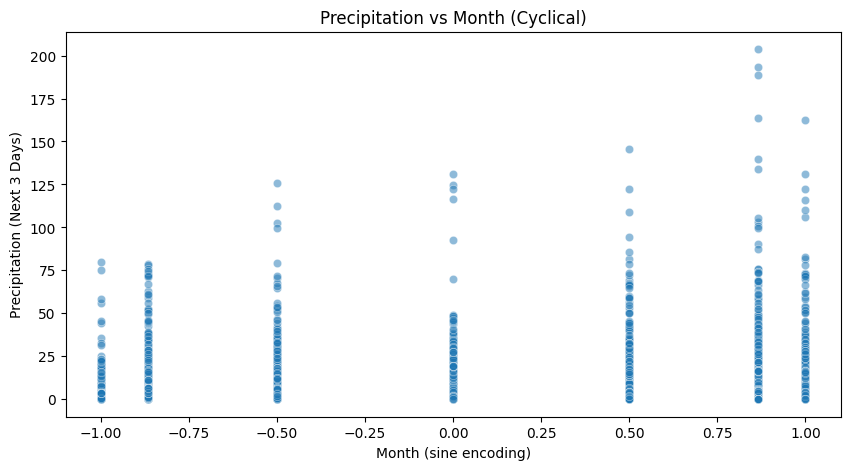

In [45]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='month_sin', y='precipitation_sum_next_3_days', data=df_clean, alpha=0.5)
plt.title("Precipitation vs Month (Cyclical)")
plt.xlabel("Month (sine encoding)")
plt.ylabel("Precipitation (Next 3 Days)")
plt.show()

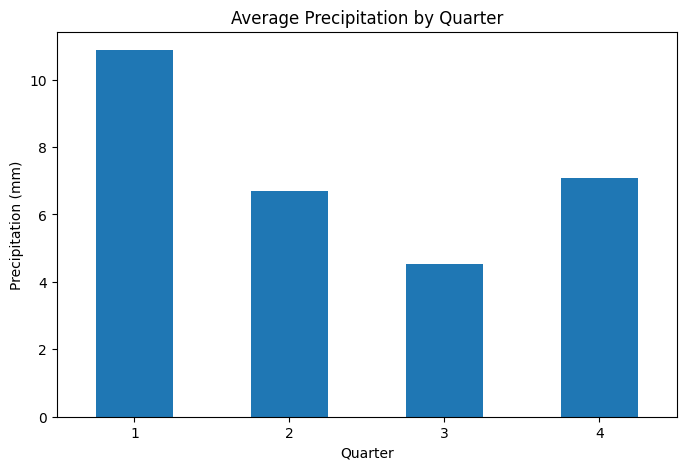

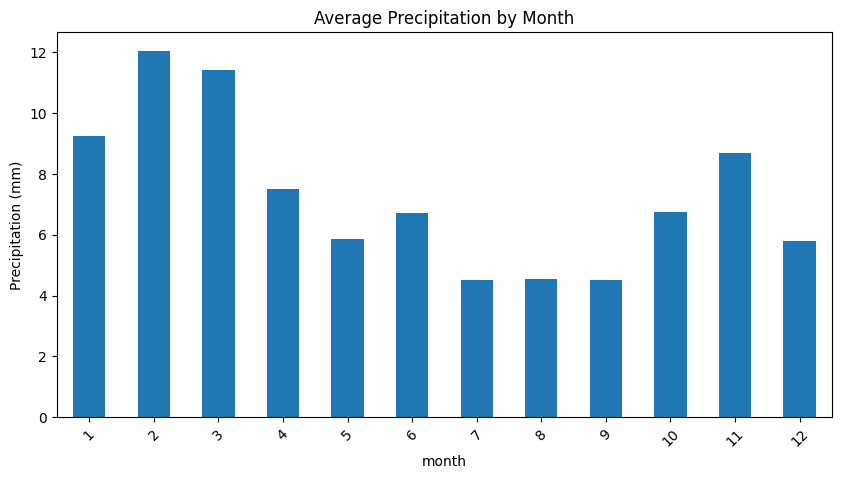

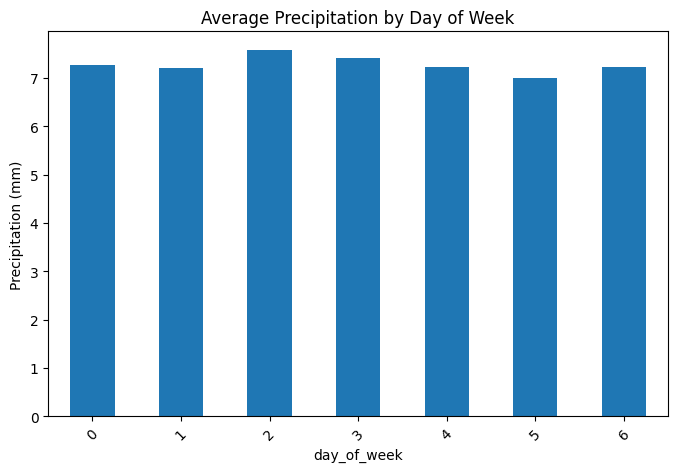

In [46]:
# Average precipitation by quarter
quarter_avg = df_clean.groupby('quarter')['precipitation_sum_next_3_days'].mean()
quarter_avg.plot(kind='bar', figsize=(8,5))
plt.title("Average Precipitation by Quarter")
plt.ylabel("Precipitation (mm)")
plt.xlabel("Quarter")
plt.xticks(rotation=0)  # straight up
plt.show()

# By month
monthly_avg = df_clean.groupby('month')['precipitation_sum_next_3_days'].mean()
monthly_avg.plot(kind='bar', figsize=(10,5))
plt.title("Average Precipitation by Month")
plt.ylabel("Precipitation (mm)")
plt.xticks(rotation=45)
plt.show()

# By day of week
dow_avg = df_clean.groupby('day_of_week')['precipitation_sum_next_3_days'].mean()
dow_avg.plot(kind='bar', figsize=(8,5))
plt.title("Average Precipitation by Day of Week")
plt.ylabel("Precipitation (mm)")
plt.xticks(rotation=45)
plt.show()


In [47]:
corr_cols = ['month_sin', 'month_cos', 'dow_sin', 'dow_cos']
print(df_clean[corr_cols + ['precipitation_sum_next_3_days']].corr()[target])

month_sin                        0.118723
month_cos                        0.070811
dow_sin                          0.008455
dow_cos                         -0.002258
precipitation_sum_next_3_days    1.000000
Name: precipitation_sum_next_3_days, dtype: float64


In [48]:
# Keep only useful time features
# Drop raw month, day, day_of_week (redundant with sine/cosine)
df_clean = df_clean.drop(columns=['month', 'day_of_week'])

In [49]:
# <Student to fill this section>
feature_2_insights = """
provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...
"""

In [50]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### C.6 Explore Feature of Interest `lag 1 and lag 2`


In [51]:
# <Student to fill this section>

In [52]:
# Lag 1 and Lag 2 of precipitation sum
df_clean['precip_sum_lag1'] = df_clean['precipitation_sum'].shift(1)
df_clean['precip_sum_lag2'] = df_clean['precipitation_sum'].shift(2)

# Optional: Drop first 2 rows with NaN after shifting
df_clean = df_clean.dropna(subset=['precip_sum_lag1', 'precip_sum_lag2'])

In [53]:
df_clean[['precipitation_sum_next_3_days', 'precip_sum_lag1', 'precip_sum_lag2']].corr()

,precipitation_sum_next_3_days,precip_sum_lag1,precip_sum_lag2
precipitation_sum_next_3_days,1.000000,0.139042,0.090774
precip_sum_lag1,0.139042,1.000000,0.381022
precip_sum_lag2,0.090774,0.381022,1.000000


In [54]:
# <Student to fill this section>
feature_n_insights = """
provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...
"""

In [55]:
# Do not modify this code
print_tile(size="h3", key='feature_n_insights', value=feature_n_insights)

## Data Splitting

Before moving to features selection, data will be split to training and test set to prevent data leakage of the test set.

In [56]:
df_train = df_clean.copy()
df_test = df_clean.copy()

In [57]:
df_train = df_clean[df_clean['date'] < '2024-01-01']
df_test  = df_clean[df_clean['date'] >= '2024-01-01']

---
## D. Feature Selection


### D.1 Approach "Correlation and VIF"


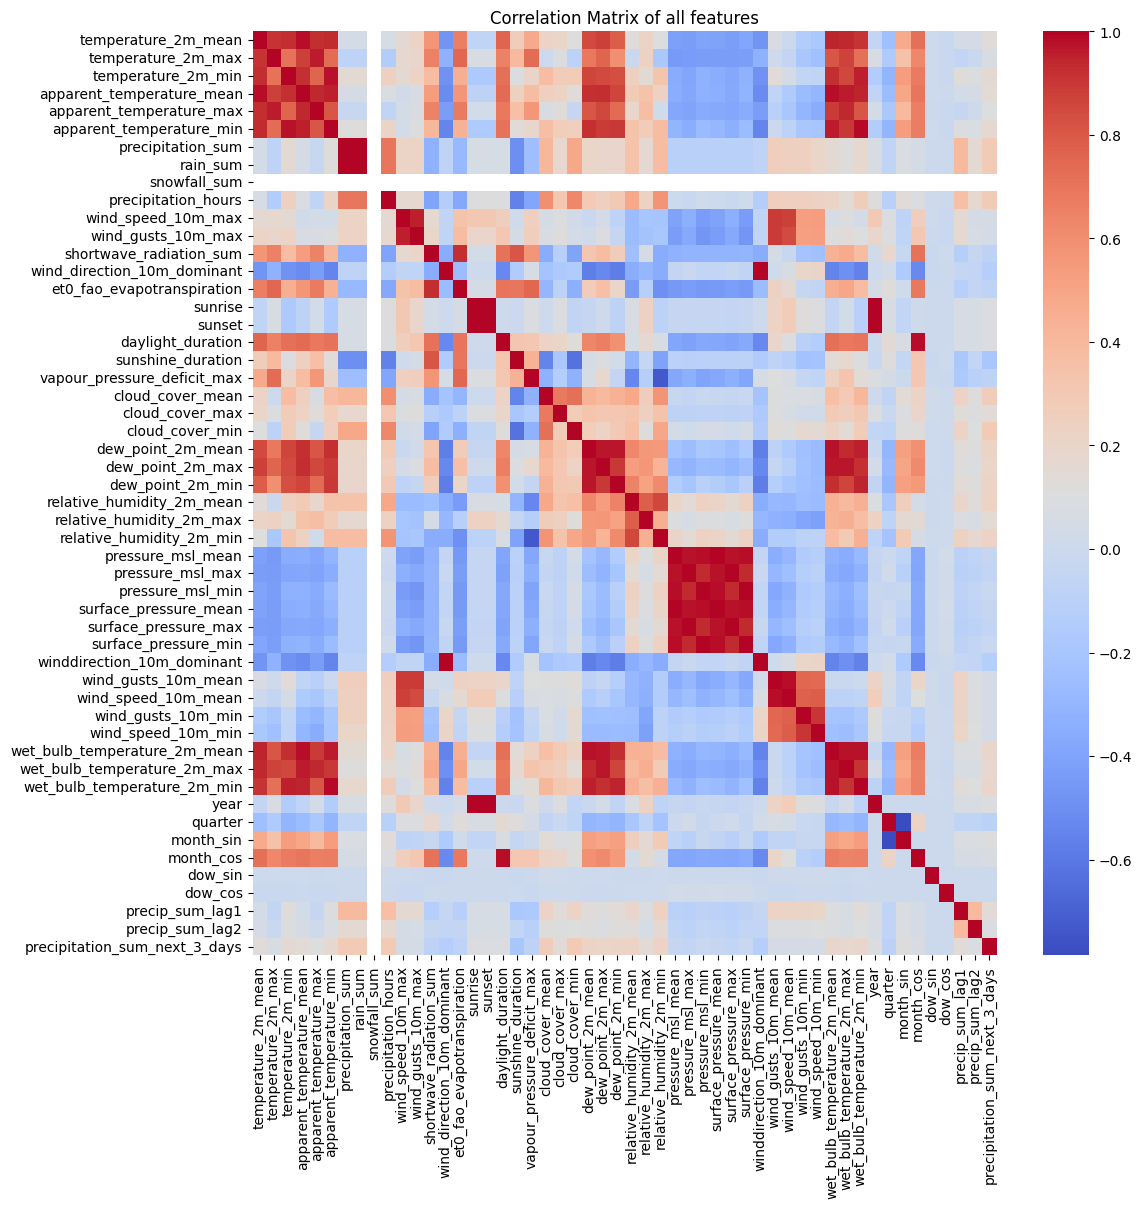

In [58]:
# Plot correlation matrix
numeric_cols = df_train.select_dtypes(include='number').columns.drop([target])
corr_matrix = df_train[numeric_cols.tolist() + [target]].corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of all features")
plt.show()

Remove snowfall_sum as the values are all 0

In [59]:
df_train.drop('snowfall_sum', axis=1, inplace=True)

In [60]:
def correlation_filter(df, threshold=0.90):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return df.drop(columns=to_drop), to_drop

def vif_filter(df, thresh=10.0):
    variables = list(df.columns)
    dropped = []
    while True:
        vif = pd.Series(
            [variance_inflation_factor(df[variables].values, i) 
             for i in range(len(variables))],
            index=variables
        )
        max_vif = vif.max()
        if max_vif > thresh:
            drop_var = vif.idxmax()
            variables.remove(drop_var)
            dropped.append(drop_var)
        else:
            break
    return df[variables], dropped


In [61]:
# Select numerical columns
numerical_cols = df_train.select_dtypes(include=[np.number]).columns

# Exclude the two target columns
feature_cols = [col for col in numerical_cols if col not in ['precipitation_sum_next_3_days']]

X = df_train.copy()
X = X[feature_cols]

In [62]:
# Correlation filtering
X_corr, dropped_corr = correlation_filter(X, threshold=0.90)
print("Dropped by correlation:", dropped_corr)

print("\n")

# VIF filtering
X_vif, dropped_vif = vif_filter(X_corr, thresh=10.0)
print("Dropped by VIF:", dropped_vif)

Dropped by correlation: ['temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_mean', 'apparent_temperature_max', 'apparent_temperature_min', 'rain_sum', 'wind_gusts_10m_max', 'et0_fao_evapotranspiration', 'sunset', 'dew_point_2m_mean', 'dew_point_2m_max', 'dew_point_2m_min', 'pressure_msl_max', 'pressure_msl_min', 'surface_pressure_mean', 'surface_pressure_max', 'surface_pressure_min', 'winddirection_10m_dominant', 'wind_speed_10m_mean', 'wind_speed_10m_min', 'wet_bulb_temperature_2m_mean', 'wet_bulb_temperature_2m_max', 'wet_bulb_temperature_2m_min', 'year', 'month_cos']


Dropped by VIF: ['relative_humidity_2m_mean', 'pressure_msl_mean', 'daylight_duration', 'relative_humidity_2m_max', 'temperature_2m_mean', 'wind_gusts_10m_mean', 'sunrise', 'sunshine_duration', 'cloud_cover_max', 'relative_humidity_2m_min', 'wind_speed_10m_max', 'quarter']


In [63]:
X_vif.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5111 entries, 2 to 5112
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   precipitation_sum            5111 non-null   float64
 1   precipitation_hours          5111 non-null   float64
 2   shortwave_radiation_sum      5111 non-null   float64
 3   wind_direction_10m_dominant  5111 non-null   float64
 4   vapour_pressure_deficit_max  5111 non-null   float64
 5   cloud_cover_mean             5111 non-null   float64
 6   cloud_cover_min              5111 non-null   float64
 7   wind_gusts_10m_min           5111 non-null   float64
 8   month_sin                    5111 non-null   float64
 9   dow_sin                      5111 non-null   float64
 10  dow_cos                      5111 non-null   float64
 11  precip_sum_lag1              5111 non-null   float64
 12  precip_sum_lag2              5111 non-null   float64
dtypes: float64(13)
memory u

In [64]:
features = [
    'weather_desc',
    'precipitation_sum',
    'precipitation_hours',
    'shortwave_radiation_sum',
    'wind_direction_10m_dominant',
    'vapour_pressure_deficit_max',
    'cloud_cover_mean',
    'cloud_cover_min',
    'wind_gusts_10m_min',
    'month_sin',
    'month_cos',
    'dow_sin',
    'dow_cos',
    'precip_sum_lag1',
    'precip_sum_lag2',
    'precipitation_sum_next_3_days'
]
df_fs = df_train.copy()
df_fs = df_fs[features]

In [65]:
# <Student to fill this section>
feature_selection_1_insights = """
provide an explanation on why you use this approach for feature selection and describe its results
"""

In [66]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

### D.2 Approach "Correlation and mutual info with target variable"


In [67]:
# Select only numeric columns
numeric_features = df_fs.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Compute correlation with target
corr_target = df_fs[numeric_features].corr()[target].sort_values(ascending=False)
print(corr_target)

precipitation_sum_next_3_days    1.000000
cloud_cover_min                  0.284861
precipitation_hours              0.284521
precipitation_sum                0.282913
cloud_cover_mean                 0.260982
precip_sum_lag1                  0.140703
month_sin                        0.113410
precip_sum_lag2                  0.090540
month_cos                        0.079124
wind_gusts_10m_min               0.057782
dow_sin                          0.002056
dow_cos                         -0.000289
vapour_pressure_deficit_max     -0.081797
shortwave_radiation_sum         -0.083786
wind_direction_10m_dominant     -0.124824
Name: precipitation_sum_next_3_days, dtype: float64


In [68]:
X = df_fs.drop(columns=[target])
y = df_fs[target]

mi = mutual_info_regression(X.select_dtypes(include=['float','int']), y)
mi_series = pd.Series(mi, index=X.select_dtypes(include=['float','int']).columns)
mi_series.sort_values(ascending=False)

cloud_cover_mean               0.086295
cloud_cover_min                0.085609
precipitation_sum              0.072489
wind_direction_10m_dominant    0.061080
month_cos                      0.058085
precipitation_hours            0.056487
month_sin                      0.053861
shortwave_radiation_sum        0.024597
precip_sum_lag1                0.021636
vapour_pressure_deficit_max    0.020409
wind_gusts_10m_min             0.010409
dow_sin                        0.000000
dow_cos                        0.000000
precip_sum_lag2                0.000000
dtype: float64

In [69]:
# <Student to fill this section>

In [70]:
X.columns

Index(['weather_desc', 'precipitation_sum', 'precipitation_hours',
       'shortwave_radiation_sum', 'wind_direction_10m_dominant',
       'vapour_pressure_deficit_max', 'cloud_cover_mean', 'cloud_cover_min',
       'wind_gusts_10m_min', 'month_sin', 'month_cos', 'dow_sin', 'dow_cos',
       'precip_sum_lag1', 'precip_sum_lag2'],
      dtype='object')

In [71]:
# <Student to fill this section>
feature_selection_2_insights = """
provide an explanation on why you use this approach for feature selection and describe its results
"""

In [72]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_2_insights', value=feature_selection_2_insights)

### D.n Approach "Random Forest Importance and RFE"

> You can add more cells related to other approaches in this section

In [73]:
from sklearn.ensemble import RandomForestRegressor

categorical_cols = ['weather_desc']  
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
model = RandomForestRegressor(n_estimators=100, random_state=33)
model.fit(X_encoded, y)

importances = pd.Series(model.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)
print(importances)

cloud_cover_mean               0.161150
wind_direction_10m_dominant    0.125288
vapour_pressure_deficit_max    0.108732
shortwave_radiation_sum        0.082502
precipitation_sum              0.081299
wind_gusts_10m_min             0.069761
precipitation_hours            0.059742
precip_sum_lag2                0.053374
precip_sum_lag1                0.053012
cloud_cover_min                0.050501
month_sin                      0.037147
dow_sin                        0.035552
dow_cos                        0.026982
month_cos                      0.025448
weather_desc_Light Drizzle     0.005973
weather_desc_Drizzle           0.005691
weather_desc_Rain              0.005044
weather_desc_Light Rain        0.004183
weather_desc_Heavy Drizzle     0.003576
weather_desc_Partly Cloudy     0.001860
weather_desc_Mainly Sunny      0.001429
weather_desc_Heavy Rain        0.001174
weather_desc_Sunny             0.000579
dtype: float64


In [74]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=33)
rfe = RFE(model, n_features_to_select=8)
rfe.fit(X_encoded, y)

selected_features = X_encoded.columns[rfe.support_]
print(selected_features)

Index(['precipitation_sum', 'precipitation_hours', 'shortwave_radiation_sum',
       'wind_direction_10m_dominant', 'vapour_pressure_deficit_max',
       'cloud_cover_mean', 'wind_gusts_10m_min', 'precip_sum_lag2'],
      dtype='object')


Dropping dow_cos, dow_sin. Keeping the other rest

## D.z Final Selection of Features

In [75]:
# <Student to fill this section>

features_list = [
    'precipitation_sum',
    'precip_sum_lag1', 
    'precip_sum_lag2', 
    'precipitation_hours',
    'cloud_cover_mean',
    'wind_direction_10m_dominant',
    'vapour_pressure_deficit_max',
    'shortwave_radiation_sum',
    'wind_gusts_10m_min',
    'month_sin',
    'month_cos'
]
target = 'precipitation_sum_next_3_days'


In [76]:
# <Student to fill this section>
feature_selection_explanations = """
provide a quick explanation on the features selected
"""

In [77]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

### E.1 Data Transformation <put_name_here>

In [78]:
# <Student to fill this section>

In [79]:
# <Student to fill this section>
data_cleaning_1_explanations = """
Provide some explanations on why you believe it is important to fix this issue and its impacts
"""

In [80]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_1_explanations)

---
## F. Feature Engineering

### F.2 New Feature "precipitation sum lag1 and lag2"




In [81]:
# <Student to fill this section>

In [82]:
# <Student to fill this section>
feature_engineering_2_explanations = """
Provide some explanations on why you believe it is important to create this feature and its impacts
"""

In [83]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

---
## G. Data Preparation for Modeling

### G.1 Split Datasets

Here, we will save X_data, y_data, X_test and y_test with all potential variables for future experiments.

In [84]:
df_test.columns

Index(['date', 'temperature_2m_mean', 'temperature_2m_max',
       'temperature_2m_min', 'apparent_temperature_mean',
       'apparent_temperature_max', 'apparent_temperature_min',
       'precipitation_sum', 'rain_sum', 'snowfall_sum', 'precipitation_hours',
       'wind_speed_10m_max', 'wind_gusts_10m_max', 'shortwave_radiation_sum',
       'wind_direction_10m_dominant', 'et0_fao_evapotranspiration', 'sunrise',
       'sunset', 'daylight_duration', 'sunshine_duration',
       'vapour_pressure_deficit_max', 'cloud_cover_mean', 'cloud_cover_max',
       'cloud_cover_min', 'dew_point_2m_mean', 'dew_point_2m_max',
       'dew_point_2m_min', 'relative_humidity_2m_mean',
       'relative_humidity_2m_max', 'relative_humidity_2m_min',
       'pressure_msl_mean', 'pressure_msl_max', 'pressure_msl_min',
       'surface_pressure_mean', 'surface_pressure_max', 'surface_pressure_min',
       'winddirection_10m_dominant', 'wind_gusts_10m_mean',
       'wind_speed_10m_mean', 'wind_gusts_10m_min', '

In [85]:
# Split features and target for train
X_data = df_train.drop(columns=[target], axis=1)
y_data = df_train[[target]] 

# Split features and target for test
X_test = df_test.drop(columns=[target], axis=1)
y_test = df_test[[target]]


---
## H. Save Datasets

> Do not change this code

In [86]:
# # Do not modify this code
# # Save training set
# try:
#   X_train.to_csv(at.folder_path / 'X_train.csv', index=False)
#   y_train.to_csv(at.folder_path / 'y_train.csv', index=False)

#   X_val.to_csv(at.folder_path / 'X_val.csv', index=False)
#   y_val.to_csv(at.folder_path / 'y_val.csv', index=False)

#   X_test.to_csv(at.folder_path / 'X_test.csv', index=False)
#   y_test.to_csv(at.folder_path / 'y_test.csv', index=False)
# except Exception as e:
#   print(e)

In [87]:
# Do not modify this code
# Save training set
try:
  X_data.to_csv('../../data/processed/X_data_reg.csv', index=False)
  y_data.to_csv('../../data/processed/y_data_reg.csv', index=False)

  X_test.to_csv('../../data/processed/X_test_reg.csv', index=False)
  y_test.to_csv('../../data/processed/y_test_reg.csv', index=False)
except Exception as e:
  print(e)

In [88]:
# Load X_data with the selected features
X_data = df_train[features_list]
y_data = df_train[target]

X_test = df_test[features_list]
y_test = df_test[target]

---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [89]:
# RMSE main scoring metric, also look at mae and r^2

In [90]:
# <Student to fill this section>
performance_metrics_explanations = """
Provide some explanations on why you believe the performance metrics you chose is appropriate
"""

In [91]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

### J.1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [92]:
# <Student to fill this section>
algorithm_selection_explanations = """
Provide some explanations on why you believe this algorithm is a good fit
"""

In [93]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [94]:
# <Student to fill this section>

In [97]:
tscv = TimeSeriesSplit(n_splits=5)

In [99]:

space = {
    'max_depth': hp.choice('max_depth', range(2, 10)),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.3)),
    'n_estimators': hp.choice('n_estimators', range(50, 500)),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0)
}

In [101]:


# Objective function
def objective(params):
    rmses = []
    maes = []
    pct_errors = []

    for train_idx, val_idx in tscv.split(X_data):
        X_train, X_val = X_data.iloc[train_idx], X_data.iloc[val_idx]
        y_train, y_val = y_data.iloc[train_idx], y_data.iloc[val_idx]

        model = xgb.XGBRegressor(
            **params,
            random_state=33,
            objective='reg:squarederror',
            tree_method='hist',
            early_stopping_rounds=20,
            n_jobs=-1
        )

        model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

        preds = model.predict(X_val)
        rmses.append(mean_squared_error(y_val, preds, squared=False))
        maes.append(mean_absolute_error(y_val, preds))

    return {
        'loss': np.mean(rmses),
        'status': STATUS_OK,
        'fold_rmse': rmses,
        'fold_mae': maes,
    }

# Run Hyperopt
trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials
)

100%|██████████| 50/50 [00:25<00:00,  1.97trial/s, best loss: 14.11384749618586]


In [102]:
# Best trial index
best_trial_idx = np.argmin([t['result']['loss'] for t in trials.trials])
best_trial = trials.trials[best_trial_idx]

# Fold-wise metrics for best hyperparameters
print("Fold-wise RMSE:", best_trial['result']['fold_rmse'])
print("Mean RMSE:", best_trial['result']['loss'])
print("Fold-wise MAE:", best_trial['result']['fold_mae'])
print("Mean MAE:", np.mean(best_trial['result']['fold_mae']))
print("\n")
# Best hyperparameters
print("Best hyperparameters:", best)

Fold-wise RMSE: [np.float64(11.006694208331913), np.float64(15.150147683770971), np.float64(11.28970179606535), np.float64(17.64770492223363), np.float64(15.474988870527433)]
Mean RMSE: 14.11384749618586
Fold-wise MAE: [np.float64(5.948014088870933), np.float64(7.072786844542857), np.float64(6.679716879442528), np.float64(8.099054846511919), np.float64(8.446671708024917)]
Mean MAE: 7.2492488734786305


Best hyperparameters: {'colsample_bytree': np.float64(0.9445449740181286), 'learning_rate': np.float64(0.10263142412596797), 'max_depth': np.int64(1), 'n_estimators': np.int64(255), 'subsample': np.float64(0.736514206056731)}


In [103]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
Explain why you are tuning these hyperparameters
"""

In [104]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [105]:
# <Student to fill this section>

In [106]:
# Map 'max_depth' choice index back to actual value
max_depth_choices = list(range(2, 10))

final_params = {
    'max_depth': max_depth_choices[int(best['max_depth'])],   # convert index to actual depth
    'n_estimators': int(best['n_estimators']),
    'learning_rate': float(best['learning_rate']),
    'subsample': float(best['subsample']),
    'colsample_bytree': float(best['colsample_bytree']),
    'random_state': 33,                                       
    'objective': 'reg:squarederror',
    'tree_method': 'hist',
    'n_jobs': -1
}


In [107]:
# Instantiate final model
final_model = xgb.XGBRegressor(**final_params)

# Fit on all training data
final_model.fit(X_data, y_data)

# Predict on test set
y_pred = final_model.predict(X_test)

### J.4 Model Technical Performance

> Provide some explanations on model performance


In [108]:
# <Student to fill this section>

In [109]:
# RMSE
test_rmse = mean_squared_error(y_test, y_pred, squared=False)

# MAE
test_mae = mean_absolute_error(y_test, y_pred)

print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)

Test RMSE: 14.189088451163894
Test MAE: 8.478923867388978


In [110]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("Test R-squared:", r2)

Test R-squared: 0.0728236734505977


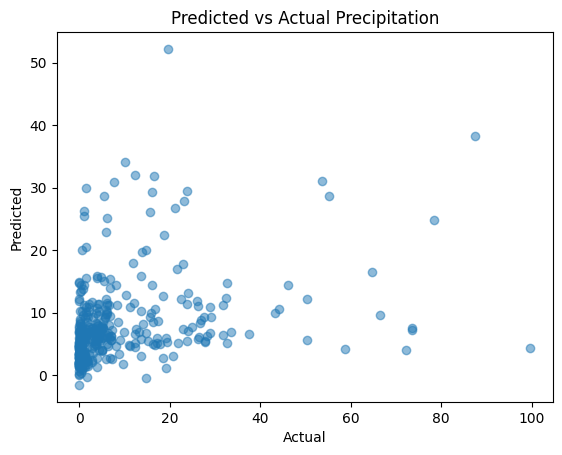

In [111]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual Precipitation")
plt.show()

In [112]:
y_test_series = y_test.squeeze()  # converts single-column DataFrame to Series

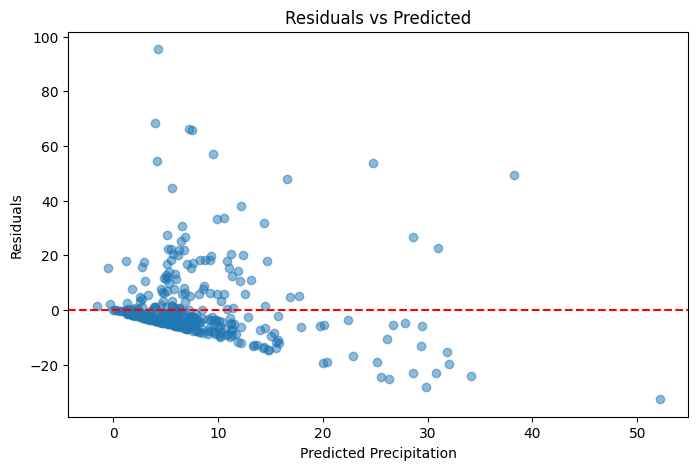

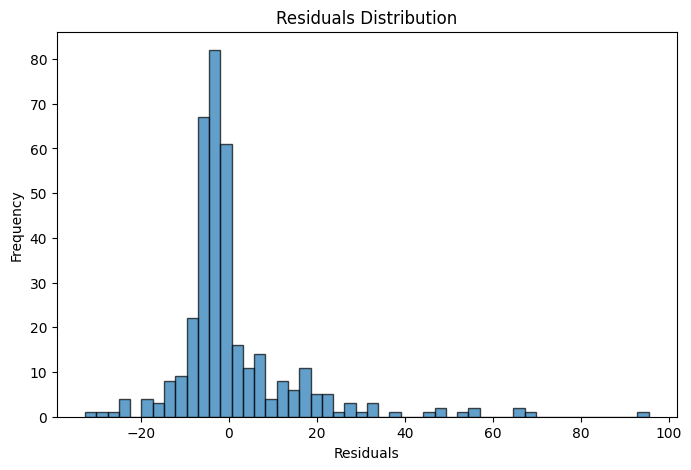

In [113]:
# Calculate residuals
residuals = y_test_series - y_pred

# Scatter plot of residuals vs predicted values
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Precipitation")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

# Histogram of residuals
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

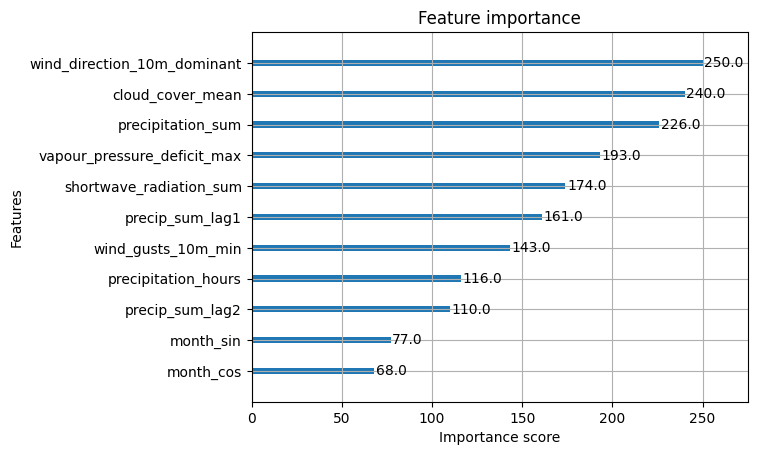

In [114]:
# Plot importances
xgb.plot_importance(final_model)
plt.show()

In [115]:
# Compute mean of training target
train_mean = y_data.mean()

# Predict test set with this mean
y_pred_baseline = np.full_like(y_test, fill_value=train_mean, dtype=np.float64)

# Evaluate
baseline_rmse = mean_squared_error(y_test, y_pred_baseline, squared=False)
baseline_mae = mean_absolute_error(y_test, y_pred_baseline)

print("Baseline RMSE on test set:", baseline_rmse)
print("Baseline MAE on test set:", baseline_mae)

Baseline RMSE on test set: 14.829742435731161
Baseline MAE on test set: 8.966953614260683


In [ ]:
# <Student to fill this section>
model_performance_explanations = """
Provide some explanations on model performance
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
business_impacts_explanations = """
Interpret the results of the experiments related to the business objective set earlier. Estimate the impacts of the incorrect results for the business (some results may have more impact compared to others)
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [ ]:
# <Student to fill this section>
experiment_outcome = "" # Either 'Hypothesis Confirmed', 'Hypothesis Partially Confirmed' or 'Hypothesis Rejected'

In [ ]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [ ]:
# <Student to fill this section>
experiment_results_explanations = """
Reflect on the outcome of the experiment and list the new insights you gained from it. Provide rationale for pursuing more experimentation with the current approach or call out if you think it is a dead end.
Given the results achieved and the overall objective of the project, list the potential next steps and experiments. For each of them assess the expected uplift or gains and rank them accordingly. If the experiment achieved the required outcome for the business, recommend the steps to deploy this solution into production.
"""

In [ ]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)